In [108]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 

# Load the dataset
df = pd.read_csv("Gold_price_2025 new.csv")

In [109]:
# Convert timestamps to datetime objects
df['timeOpen'] = pd.to_datetime(df['timeOpen'], unit='ms')
df['timeClose'] = pd.to_datetime(df['timeClose'], unit='ms')
df['timeHigh'] = pd.to_datetime(df['timeHigh'], unit='ms')
df['timeLow'] = pd.to_datetime(df['timeLow'], unit='ms')

In [110]:
df.head()

,timeOpen,timeClose,timeHigh,timeLow,priceOpen,priceHigh,priceLow,priceClose,volume
0,2025-07-26 12:00:00,2025-07-27 11:59:59.999,2025-07-27 04:08:00,2025-07-26 12:52:00,"0,006715796828","0,006865782367","0,006714274853","0,006842611523",0
1,2025-07-25 12:00:00,2025-07-26 11:59:59.999,2025-07-26 03:10:00,2025-07-25 13:59:00,"0,006643911641","0,006718620251","0,006642475657","0,006715796828",0
2,2025-07-24 12:00:00,2025-07-25 11:59:59.999,2025-07-24 12:08:00,2025-07-25 03:56:00,"0,006750933166","0,006752793583","0,006642331031","0,006643911641",0
3,2025-07-23 12:00:00,2025-07-24 11:59:59.999,2025-07-23 23:16:00,2025-07-24 09:42:00,"0,007042174606","0,007053935013","0,006749428149","0,006750933166",0
4,2025-07-22 12:00:00,2025-07-23 11:59:59.999,2025-07-23 06:52:00,2025-07-23 10:04:00,"0,007057862602","0,007093906453","0,006988306188","0,007042174606","130,07"


In [111]:
# Convert price columns from string with comma to float
price_cols = ['priceOpen', 'priceHigh', 'priceLow', 'priceClose']
for col in price_cols:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Sort data by timeOpen
df = df.sort_values(by='timeOpen').set_index('timeOpen')

In [112]:
# Feature Engineering for Time-Series Forecasting
df['year'] = df['timeOpen'].dt.year
df['month'] = df['timeOpen'].dt.month
df['day'] = df['timeOpen'].dt.day
df['dayofweek'] = df['timeOpen'].dt.dayofweek
df['dayofyear'] = df['timeOpen'].dt.dayofyear

In [113]:
df.head()

,timeOpen,timeClose,timeHigh,timeLow,priceOpen,priceHigh,priceLow,priceClose,volume,year,month,day,dayofweek,dayofyear
0,2023-09-28 12:00:00,2023-09-29 11:59:59.999,2023-09-29 09:46:00,2023-09-28 21:07:00,0.073399,0.080313,0.053063,0.069234,"686623,52",2023,9,28,3,271
1,2023-09-29 12:00:00,2023-09-30 11:59:59.999,2023-09-30 01:48:00,2023-09-29 16:14:00,0.069228,0.092316,0.067428,0.083172,"636096,26",2023,9,29,4,272
2,2023-09-30 12:00:00,2023-10-01 11:59:59.999,2023-09-30 12:11:00,2023-10-01 02:59:00,0.082819,0.085920,0.066259,0.071293,"496155,47",2023,9,30,5,273
3,2023-10-01 12:00:00,2023-10-02 11:59:59.999,2023-10-02 09:13:00,2023-10-01 15:26:00,0.071286,0.076899,0.064214,0.071626,"595946,93",2023,10,1,6,274
4,2023-10-02 12:00:00,2023-10-03 11:59:59.999,2023-10-03 03:44:00,2023-10-02 23:50:00,0.071623,0.071826,0.064886,0.068103,"557343,51",2023,10,2,0,275


In [114]:
# Calculate daily returns for volatility
df['daily_return'] = df['priceClose'].pct_change() * 100
df['log_return'] = np.log(df['priceClose'] / df['priceClose'].shift(1))

C:\Users\disha\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [115]:
print("Processed DataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
df.info()

Processed DataFrame Head:
             timeOpen               timeClose            timeHigh  \
0 2023-09-28 12:00:00 2023-09-29 11:59:59.999 2023-09-29 09:46:00   
1 2023-09-29 12:00:00 2023-09-30 11:59:59.999 2023-09-30 01:48:00   
2 2023-09-30 12:00:00 2023-10-01 11:59:59.999 2023-09-30 12:11:00   
3 2023-10-01 12:00:00 2023-10-02 11:59:59.999 2023-10-02 09:13:00   
4 2023-10-02 12:00:00 2023-10-03 11:59:59.999 2023-10-03 03:44:00   

              timeLow  priceOpen  priceHigh  priceLow  priceClose     volume  \
0 2023-09-28 21:07:00   0.073399   0.080313  0.053063    0.069234  686623,52   
1 2023-09-29 16:14:00   0.069228   0.092316  0.067428    0.083172  636096,26   
2 2023-10-01 02:59:00   0.082819   0.085920  0.066259    0.071293  496155,47   
3 2023-10-01 15:26:00   0.071286   0.076899  0.064214    0.071626  595946,93   
4 2023-10-02 23:50:00   0.071623   0.071826  0.064886    0.068103  557343,51   

   year  month  day  dayofweek  dayofyear  daily_return  log_return  
0  2023 

In [116]:
df.head()

,timeOpen,timeClose,timeHigh,timeLow,priceOpen,priceHigh,priceLow,priceClose,volume,year,month,day,dayofweek,dayofyear,daily_return,log_return
0,2023-09-28 12:00:00,2023-09-29 11:59:59.999,2023-09-29 09:46:00,2023-09-28 21:07:00,0.073399,0.080313,0.053063,0.069234,"686623,52",2023,9,28,3,271,NaN,NaN
1,2023-09-29 12:00:00,2023-09-30 11:59:59.999,2023-09-30 01:48:00,2023-09-29 16:14:00,0.069228,0.092316,0.067428,0.083172,"636096,26",2023,9,29,4,272,20.131440,0.183416
2,2023-09-30 12:00:00,2023-10-01 11:59:59.999,2023-09-30 12:11:00,2023-10-01 02:59:00,0.082819,0.085920,0.066259,0.071293,"496155,47",2023,9,30,5,273,-14.282929,-0.154118
3,2023-10-01 12:00:00,2023-10-02 11:59:59.999,2023-10-02 09:13:00,2023-10-01 15:26:00,0.071286,0.076899,0.064214,0.071626,"595946,93",2023,10,1,6,274,0.467446,0.004664
4,2023-10-02 12:00:00,2023-10-03 11:59:59.999,2023-10-03 03:44:00,2023-10-02 23:50:00,0.071623,0.071826,0.064886,0.068103,"557343,51",2023,10,2,0,275,-4.918223,-0.050433


In [117]:
# Select the target variable
time_series_data = df[['timeOpen', 'priceClose']].set_index('timeOpen')

# Resample to daily frequency (if not already daily and to handle missing days)
time_series_data = time_series_data.resample('D').last().ffill()

In [118]:
# Ensure all prices are strictly positive before taking log.
if (time_series_data['priceClose'] <= 0).any():
    print("Warning: Some priceClose values are non-positive. Adjusting for log transformation.")
    time_series_data['priceClose'] = time_series_data['priceClose'].apply(lambda x: max(x, 1e-9)) # Set to a very small positive number
time_series_data['log_priceClose'] = np.log(time_series_data['priceClose'])

In [119]:
# --- Linear Regression for 1-year trend forecasting on log-transformed prices ---
# Prepare data for Linear Regression: use numerical index as feature
# We'll train on the entire dataset for forecasting
X_full = np.arange(len(time_series_data)).reshape(-1, 1)
y_full_log = time_series_data['log_priceClose'].values

In [120]:
linear_model_log = LinearRegression()
linear_model_log.fit(X_full, y_full_log)

LinearRegression()

In [121]:
# --- Forecasting for the next 1 year (daily) ---
forecast_horizon_days = 365 # 1 year forecast
last_historical_date = time_series_data.index[-1]
future_dates = pd.date_range(start=last_historical_date + pd.Timedelta(days=1),
                             periods=forecast_horizon_days,
                             freq='D')


In [122]:
# Create numerical indices for future dates
X_future = np.arange(len(time_series_data), len(time_series_data) + len(future_dates)).reshape(-1, 1)
future_log_predictions = linear_model_log.predict(X_future)

In [123]:
# --- Inverse Transform the predictions to get actual prices ---
future_linear_predictions_actual_price = np.exp(future_log_predictions)
# Create a DataFrame for future predictions
forecast_df = pd.DataFrame({'priceClose': future_linear_predictions_actual_price.flatten()}, index=future_dates)

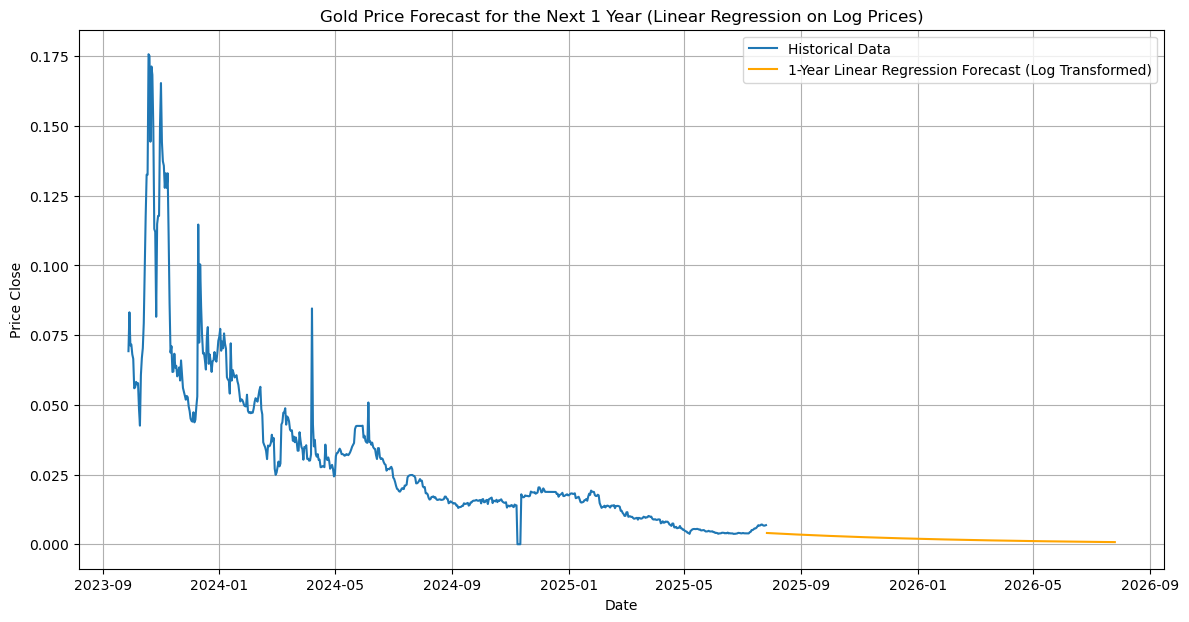

In [124]:
# Plotting the historical data and 1-year forecast
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index, time_series_data['priceClose'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['priceClose'], label='1-Year Linear Regression Forecast (Log Transformed)', color='orange')
plt.title('Gold Price Forecast for the Next 1 Year (Linear Regression on Log Prices)')
plt.xlabel('Date')
plt.ylabel('Price Close')
plt.legend()
plt.grid(True)
plt.show()

In [125]:
print("\n1-Year Forecast Head:")
print(forecast_df.head())
print("\n1-Year Forecast Tail:")
print(forecast_df.tail())


1-Year Forecast Head:
            priceClose
2025-07-27    0.004029
2025-07-28    0.004010
2025-07-29    0.003992
2025-07-30    0.003974
2025-07-31    0.003955

1-Year Forecast Tail:
            priceClose
2026-07-22    0.000770
2026-07-23    0.000767
2026-07-24    0.000763
2026-07-25    0.000760
2026-07-26    0.000756


In [126]:
# --- User-defined date lookup ---
def get_price_for_date(forecast_data_frame, historical_data_frame, target_date_str):
    """
    Looks up the predicted or historical price for a user-defined date.
    Args:
        forecast_data_frame (pd.DataFrame): DataFrame containing future forecasts.
        historical_data_frame (pd.DataFrame): DataFrame containing historical data.
        target_date_str (str): Date string in 'YYYY-MM-DD' format.
    Returns:
        float or str: Predicted price, historical price, or an error message.
    """
    try:
        target_date = pd.to_datetime(target_date_str)
    except ValueError:
        return "Error: Invalid date format. Please use YYYY-MM-DD."
    # Check if the date is in the historical data
    if target_date in historical_data_frame.index:
        price = historical_data_frame.loc[target_date, 'priceClose']
        return f"Historical Price for {target_date_str}: {price:.6f}"
    # Check if the date is in the forecast data
    elif target_date in forecast_data_frame.index:
        price = forecast_data_frame.loc[target_date, 'priceClose']
        return f"Predicted Price for {target_date_str}: {price:.6f}"
    else:
        # Handle cases where the date is outside both historical and forecast ranges
        if target_date < historical_data_frame.index.min():
            return f"Date {target_date_str} is before the historical data starts."
        elif target_date > forecast_data_frame.index.max():
            return f"Date {target_date_str} is beyond the 1-year forecast horizon."
        else:
            return f"Price for {target_date_str} not available (e.g., weekend/holiday not in forecast, or gap)."

In [127]:
# Example usage of the lookup function
print("\n--- Price Lookup for Specific Dates ---")
while True:
    user_date_input = input("Enter a date (YYYY-MM-DD) to get the gold price forecast (or 'q' to quit): ")
    if user_date_input.lower() == 'q':
        break
    
    result = get_price_for_date(forecast_df, time_series_data, user_date_input)
    print(result)
    print("")


--- Price Lookup for Specific Dates ---


Enter a date (YYYY-MM-DD) to get the gold price forecast (or 'q' to quit):  2025-11-16


Predicted Price for 2025-11-16: 0.002408



Enter a date (YYYY-MM-DD) to get the gold price forecast (or 'q' to quit):  q


In [133]:
# Use daily_return for VaR/CVaR calculation
returns_for_risk = df['daily_return'].dropna()

In [134]:
# --- DIAGNOSTIC 5: Inspect returns_for_risk after dropna ---
print("\n--- returns_for_risk after dropna (first 5) ---")
print(returns_for_risk.head())
print("--- returns_for_risk after dropna (last 5) ---")
print(returns_for_risk.tail())
print(f"Length of returns_for_risk: {len(returns_for_risk)}")
print(f"Number of NaNs in returns_for_risk: {returns_for_risk.isnull().sum()}")
print(f"Number of infs in returns_for_risk: {np.isinf(returns_for_risk).sum()}")
print("-" * 30)


--- returns_for_risk after dropna (first 5) ---
1    20.131440
2   -14.282929
3     0.467446
4    -4.918223
5    -2.357789
Name: daily_return, dtype: float64
--- returns_for_risk after dropna (last 5) ---
659   -0.222277
660   -4.135675
661   -1.585285
662    1.081971
663    1.888305
Name: daily_return, dtype: float64
Length of returns_for_risk: 660
Number of NaNs in returns_for_risk: 0
Number of infs in returns_for_risk: 1
------------------------------


In [135]:
# --- 1. Overall Historical Volatility & Return Statistics ---
# Check if returns_for_risk is empty or contains problematic values
if returns_for_risk.empty:
    print("\nError: returns_for_risk is empty. Cannot calculate statistics.")
elif np.isinf(returns_for_risk).any() or returns_for_risk.isnull().any():
    print("\nError: returns_for_risk contains Inf or NaN values. Cannot calculate clean statistics.")
    # Filter out inf and NaN for calculation if you want to proceed with partial data
    returns_for_risk_clean = returns_for_risk[~np.isinf(returns_for_risk) & ~returns_for_risk.isnull()]
    if returns_for_risk_clean.empty:
        print("Error: returns_for_risk is empty even after cleaning Inf/NaN.")
        mean_daily_return = np.nan
        std_daily_return = np.nan
    else:
        mean_daily_return = returns_for_risk_clean.mean()
        std_daily_return = returns_for_risk_clean.std()
else:
    mean_daily_return = returns_for_risk.mean()
    std_daily_return = returns_for_risk.std()
annualized_volatility = std_daily_return * np.sqrt(252) # Assuming 252 trading days


Error: returns_for_risk contains Inf or NaN values. Cannot calculate clean statistics.


In [138]:
# Check if the index is datetime type, if not convert it
if not isinstance(returns_for_risk.index, pd.DatetimeIndex):
    # If the index contains date strings, convert to datetime
    try:
        # Try to convert the index to datetime
        returns_for_risk.index = pd.to_datetime(returns_for_risk.index)
    except:
        # If conversion fails, use numeric formatting instead of date formatting
        start_date = str(returns_for_risk.index.min())
        end_date = str(returns_for_risk.index.max())
        print(f"\n--- Gold Price Daily Return Statistics (Index from {start_date} to {end_date}) ---")
        print(f"Average Daily Return: {mean_daily_return:.4f}%")
        print(f"Historical Daily Volatility (Standard Deviation of Returns): {std_daily_return:.4f}%")
        print(f"Annualized Volatility: {annualized_volatility:.4f}%")
else:
    # Original code for datetime index
    start_date = returns_for_risk.index.min().strftime('%Y-%m-%d')
    end_date = returns_for_risk.index.max().strftime('%Y-%m-%d')
    print(f"\n--- Gold Price Daily Return Statistics ({start_date} to {end_date}) ---")
    print(f"Average Daily Return: {mean_daily_return:.4f}%")
    print(f"Historical Daily Volatility (Standard Deviation of Returns): {std_daily_return:.4f}%")
    print(f"Annualized Volatility: {annualized_volatility:.4f}%")


--- Gold Price Daily Return Statistics (1970-01-01 to 1970-01-01) ---
Average Daily Return: -0.0603%
Historical Daily Volatility (Standard Deviation of Returns): 11.8245%
Annualized Volatility: 187.7086%


In [139]:
# --- 2. Time-Varying Volatility (Rolling Standard Deviation) ---
rolling_window = 20 # 20 trading days ~ 1 month
rolling_volatility = returns_for_risk.rolling(window=rolling_window).std().dropna()

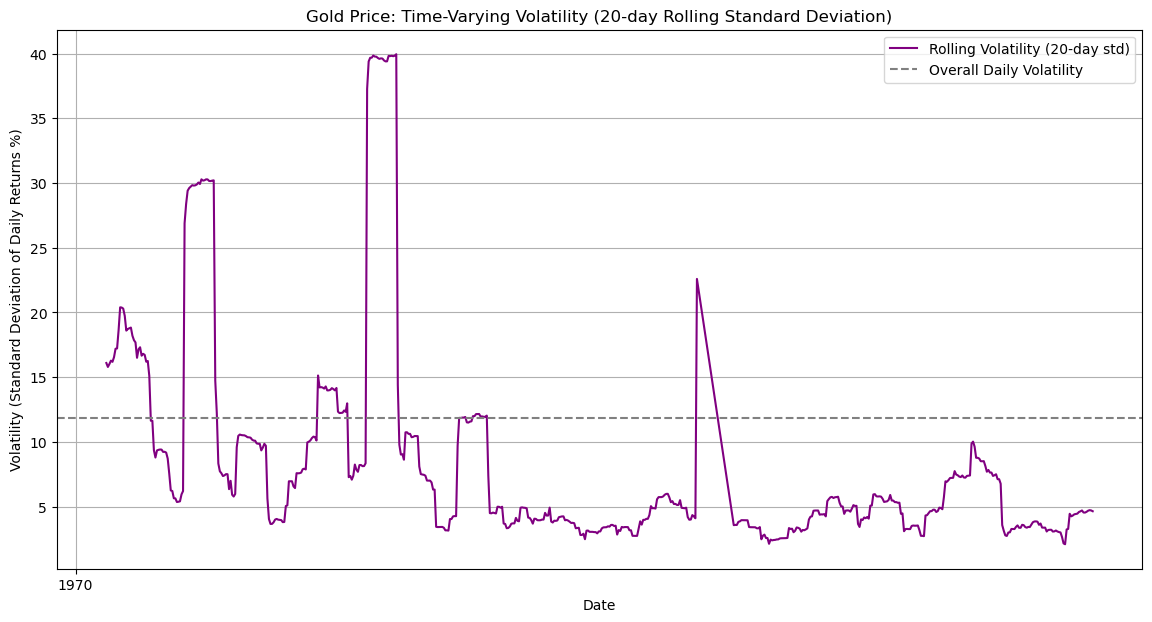

In [140]:
plt.figure(figsize=(14, 7))
plt.plot(rolling_volatility.index, rolling_volatility, label=f'Rolling Volatility ({rolling_window}-day std)', color='purple')
plt.axhline(y=std_daily_return, color='gray', linestyle='--', label='Overall Daily Volatility')
plt.title(f'Gold Price: Time-Varying Volatility ({rolling_window}-day Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation of Daily Returns %)')
plt.legend()
plt.grid(True)
plt.show()

In [141]:
# --- 3. Value at Risk (VaR) and Conditional Value at Risk (CVaR) ---
# Using Historical Simulation Method for VaR and CVaR
# This method directly uses historical returns, making no assumptions about distribution.
confidence_levels = [95, 99] # %
time_horizons_days = [1, 5, 20] # Days (1-day, 1-week, 1-month approx.)
print("\n--- Value at Risk (VaR) and Conditional Value at Risk (CVaR) Analysis ---")
print("Calculated using Historical Simulation Method (non-parametric).")


--- Value at Risk (VaR) and Conditional Value at Risk (CVaR) Analysis ---
Calculated using Historical Simulation Method (non-parametric).


In [142]:
for conf in confidence_levels:
    print(f"\n--- {conf}% Confidence Level ---")
    for horizon in time_horizons_days:
        # Calculate multi-day returns for historical simulation
        # For a 'horizon' day VaR, we need to calculate the returns over 'horizon' day periods.
        # This is more accurate than scaling 1-day VaR by sqrt(T).
        
        # Create rolling sums of returns for the specified horizon
        # Ensure returns_for_risk is sorted by index before rolling sum
        multi_day_returns = returns_for_risk.rolling(window=horizon).sum().dropna()
        
        # Calculate VaR (the percentile of the multi-day returns)
        var_percentile = 100 - conf
        var_value = np.percentile(multi_day_returns, var_percentile)
        
        # Calculate CVaR (average of losses beyond VaR)
        # Select returns that are worse than VaR
        cvar_losses = multi_day_returns[multi_day_returns <= var_value]
        cvar_value = cvar_losses.mean() if not cvar_losses.empty else var_value # Handle empty case
        print(f"  {horizon}-Day VaR: {abs(var_value):.4f}%") # Display as positive loss
        print(f"  {horizon}-Day CVaR: {abs(cvar_value):.4f}%") # Display as positive loss


--- 95% Confidence Level ---
  1-Day VaR: 12.1416%
  1-Day CVaR: 21.3271%
  5-Day VaR: 24.8591%
  5-Day CVaR: 39.2147%
  20-Day VaR: 49.5748%
  20-Day CVaR: 65.0152%

--- 99% Confidence Level ---
  1-Day VaR: 23.0031%
  1-Day CVaR: 42.0181%
  5-Day VaR: 48.1068%
  5-Day CVaR: 67.3768%
  20-Day VaR: 77.0779%
  20-Day CVaR: 86.5891%


In [143]:
# --- 4. Drawdown Analysis ---
# Calculate cumulative returns
cumulative_returns = (1 + returns_for_risk / 100).cumprod()
# Calculate rolling maximum (peak)
rolling_max = cumulative_returns.cummax()
# Calculate drawdown
drawdown = (cumulative_returns - rolling_max) / rolling_max * 100
# Find max drawdown
max_drawdown = drawdown.min()

C:\Users\disha\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


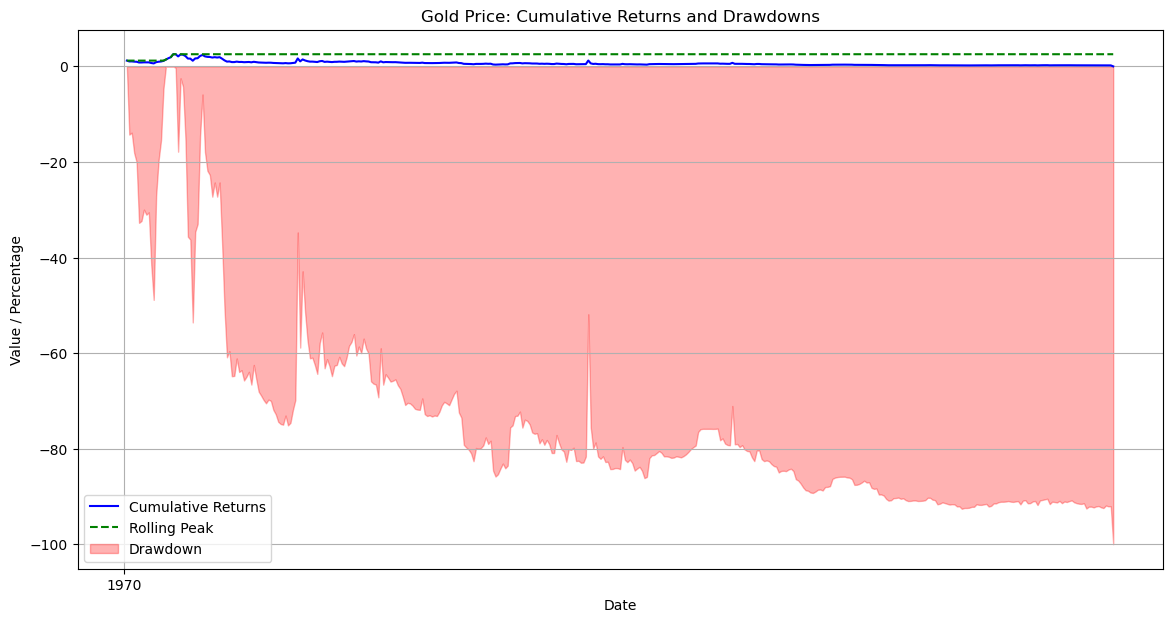

In [144]:
plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns.index, cumulative_returns, label='Cumulative Returns', color='blue')
plt.plot(rolling_max.index, rolling_max, label='Rolling Peak', color='green', linestyle='--')
plt.fill_between(drawdown.index, 0, drawdown, color='red', alpha=0.3, label='Drawdown')
plt.title('Gold Price: Cumulative Returns and Drawdowns')
plt.xlabel('Date')
plt.ylabel('Value / Percentage')
plt.legend()
plt.grid(True)
plt.show()

In [145]:
print(f"\n--- Drawdown Analysis ---")
print(f"Maximum Drawdown: {max_drawdown:.4f}%")
print("  - This represents the largest peak-to-trough decline in gold price observed historically.")
print("  - It's a measure of the 'pain' an investor would have experienced.")


--- Drawdown Analysis ---
Maximum Drawdown: -100.0000%
  - This represents the largest peak-to-trough decline in gold price observed historically.
  - It's a measure of the 'pain' an investor would have experienced.
